Converged after 13 iterations.


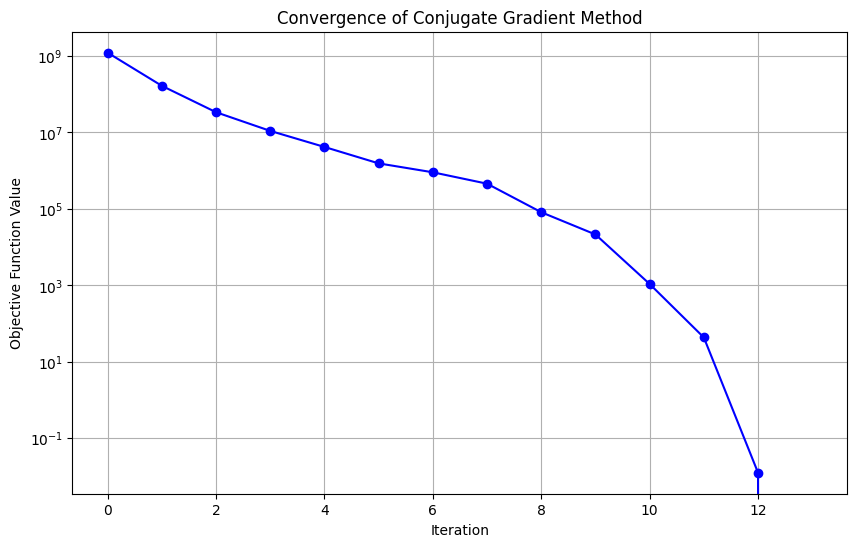

Minimum found at: [[-1.43076956]
 [ 1.37049577]
 [ 0.26736435]
 ...
 [ 0.95590037]
 [-2.221942  ]
 [ 2.17956756]]
[1208301687.4065847, 164231374.61453423, 33518084.756044865, 10874690.524942476, 4135685.585423207, 1537696.7028877412, 898634.1329550595, 452316.7717785588, 81082.84461649496, 21222.38409655974, 1074.4273700472475, 42.86061242049096, 0.012402057515023827, 0.0]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return np.linalg.norm(residual)**2

def grad_f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return 2 * np.dot(np.transpose(A), residual)

def armijo_rule(A, b, x, d, grad_f, sigma=0.1, mu=0.25):
    alpha = 1.0
    while f(A, x + alpha * d, b) > f(A, x, b) + sigma * alpha * np.dot(grad_f(A, x, b).flatten(), d.flatten()):
        alpha *= mu
    return alpha

def conjugate_gradient_with_armijo(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0
    g = -grad_f(A, x, b)
    d = g
    f_values = [f(A, x, b)]  # Store the initial function value
    for i in range(max_iter):
        alpha = armijo_rule(A, b, x, d, grad_f)
        x = x + alpha * d
        g_new = -grad_f(A, x, b)
        f_values.append(f(A, x, b))  # Store functpion value at current iteration
        if np.linalg.norm(g_new) < tol:
            print(f"Converged after {i+1} iterations.")
            return x, f_values
        beta = np.dot(g_new.flatten(), g_new.flatten()) / np.dot(g.flatten(), g.flatten())
        d = g_new + beta * d
        g = g_new
    print("Did not converge within the maximum number of iterations.")
    return x, f_values

# Define the dimensions
m = int(input("please enter n")) 
n = int(input("please enter m"))

# Generate random A, x, and b
np.random.seed(42)
A = 10 * (np.random.randn(m, n) - np.random.randn(m, n))
x_true = np.random.randn(n, 1) - np.random.randn(n, 1)
b = np.dot(A, x_true) + 0.01 * np.eye(m).dot(np.maximum(np.dot(A, x_true) - np.random.randn(m, 1), 0))

# Initial guess
x0 = np.random.randn(n, 1)

# Run the conjugate gradient method
minimum, f_values = conjugate_gradient_with_armijo(A, b, x0)

# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(f_values, marker='o', linestyle='-', color='b')
plt.title('Convergence of Conjugate Gradient Method')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.yscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.show()

print("Minimum found at:", minimum)
print(f_values)
